Mental Health Prediction From Social Media,
Data set used here is from the social media Reddit,
Data set is available in Kaggle.

Link to the dataset: https://www.kaggle.com/datasets/entenam/reddit-mental-health-dataset
Do edit the cells below and upload this dataset to run this program, as dataset uploaded in the cells below is via google drive (private drive)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [3]:
import os
import pandas as pd
path = '/content/dataset/Original Reddit Data/Labelled Data'

In [4]:
all_files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]

dfs = []

for file in all_files:
    df = pd.read_csv(file)

    # Check if 'subreddit' exists, add it if missing
    if 'subreddit' not in df.columns:
        df['subreddit'] = None

    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

print(combined_df.head())

   score                                           selftext subreddit  \
0    1.0  Tried to watch this documentary “anxious Ameri...   Anxiety   
1    1.0  i’m currently laying in bed wide awake, feelin...   Anxiety   
2    2.0  Second time trying weed. First time felt close...   Anxiety   
3    1.0  I am not posting this for me, but rather for m...   Anxiety   
4    1.0  21 year old male been dealing with anxiety eve...   Anxiety   

                                               title             Label CAT 1  
0                        Do people get over anxiety?  Drug and Alcohol   NaN  
1  does anyone else have this big fear of suddenl...  Drug and Alcohol   NaN  
2         3 hour long panic attack after trying weed  Drug and Alcohol   NaN  
3  Please leave in the comments ANYTHING that has...  Drug and Alcohol   NaN  
4                                    Alcohol induced  Drug and Alcohol   NaN  


In [5]:
combined_df.to_csv('/content/dataset/combined_dataset.csv', index=False)

In [6]:
print(combined_df.isnull().sum())

combined_df['subreddit'].fillna('Unknown', inplace=True)

score         23
selftext      23
subreddit     23
title         23
Label         23
CAT 1        623
dtype: int64


<ipython-input-6-3903e4885bac>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['subreddit'].fillna('Unknown', inplace=True)


In [7]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
        text = text.lower()  # Convert to lowercase
        return text
    else:
        return ''  # or return float('nan')

combined_df['selftext'] = combined_df['selftext'].apply(clean_text)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'subreddit' column
le = LabelEncoder()
combined_df['subreddit_encoded'] = le.fit_transform(combined_df['subreddit'])


In [9]:
from sklearn.model_selection import train_test_split

X = combined_df['selftext']
y = combined_df['subreddit_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
print(combined_df.describe())
print(combined_df.info())
print(combined_df['subreddit'].value_counts())

            score  subreddit_encoded
count  800.000000         823.000000
mean     1.010000           2.382746
std      0.122142           1.775898
min      1.000000           0.000000
25%      1.000000           1.000000
50%      1.000000           3.000000
75%      1.000000           3.000000
max      3.000000           5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   score              800 non-null    float64
 1   selftext           823 non-null    object 
 2   subreddit          823 non-null    object 
 3   title              800 non-null    object 
 4   Label              800 non-null    object 
 5   CAT 1              200 non-null    object 
 6   subreddit_encoded  823 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 45.1+ KB
None
subreddit
depression      277
Anxiety         187
mentalhealth 

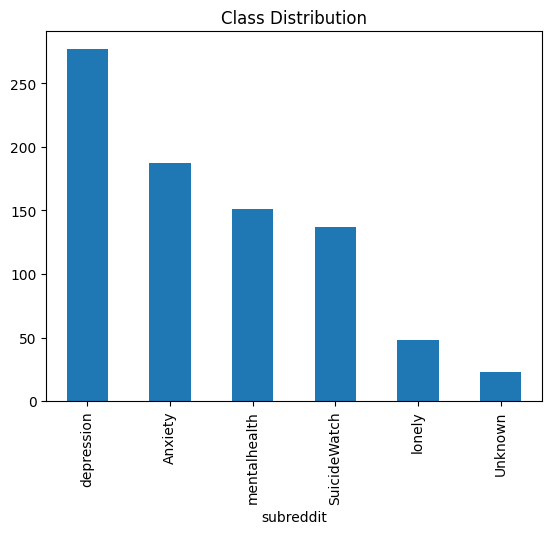

In [11]:
import matplotlib.pyplot as plt
combined_df['subreddit'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

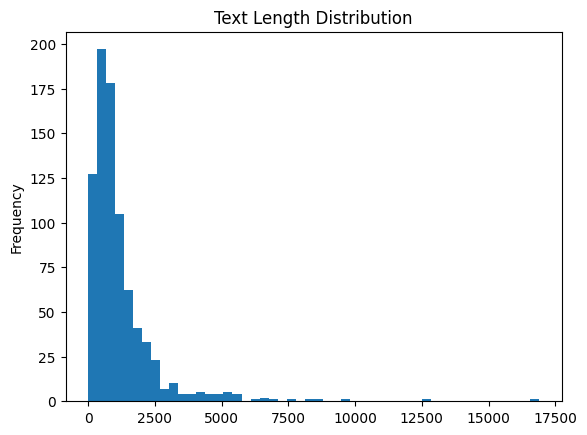

In [12]:
combined_df['selftext'] = combined_df['selftext'].apply(len)
combined_df['selftext'].plot(kind='hist', bins=50, title='Text Length Distribution')
plt.show()

In [13]:
combined_df['selftext'] = combined_df['selftext'].astype(str)
combined_df['selftext'] = combined_df['selftext'].fillna('')

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(combined_df['selftext'])

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

In [15]:
# tokenizing for transfer learning

from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

X_train_tokens = tokenizer(list(X_train), padding=True, truncation=True, max_length=200, return_tensors="pt")
X_test_tokens = tokenizer(list(X_test), padding=True, truncation=True, max_length=200, return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

PROTOTYPICAL NETWORK Meta Learning

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

class PrototypicalNetwork(nn.Module):
    def __init__(self, embedding_dim):
        super(PrototypicalNetwork, self).__init__()
        self.embedding = nn.Sequential(
            nn.Linear(200, 128),
            nn.ReLU(),
            nn.Linear(128, embedding_dim)
        )

    def forward(self, x):
        return self.embedding(x)

In [17]:
def calculate_prototypes(embeddings, labels, unique_labels):
    prototypes = []
    for c in unique_labels:
        mask = (labels == c).nonzero(as_tuple=True)[0]
        class_embeddings = embeddings[mask]

        if len(class_embeddings) == 0:
            raise ValueError(f"No embeddings found for class {c}. Check your dataset!")

        prototype = class_embeddings.mean(dim=0)
        prototypes.append(prototype)
    return torch.stack(prototypes)

In [18]:
X_train_tensor = torch.tensor(X_train_pad).float()
y_train_tensor = torch.tensor(y_train.to_numpy()).long()
X_test_tensor = torch.tensor(X_test_pad).float()
y_test_tensor = torch.tensor(y_test.to_numpy()).long()

label_encoder = LabelEncoder()
y_train_tensor = torch.tensor(label_encoder.fit_transform(y_train_tensor.numpy()))
y_test_tensor = torch.tensor(label_encoder.transform(y_test_tensor.numpy()))

min_samples_train = min(len(X_train_tensor), len(y_train_tensor))
X_train_tensor = X_train_tensor[:min_samples_train]
y_train_tensor = y_train_tensor[:min_samples_train]

min_samples_test = min(len(X_test_tensor), len(y_test_tensor))
X_test_tensor = X_test_tensor[:min_samples_test]
y_test_tensor = y_test_tensor[:min_samples_test]

unique_labels = torch.unique(y_train_tensor)
num_classes = len(unique_labels)
print(f"Number of classes: {num_classes}, Unique labels: {unique_labels}")

Number of classes: 6, Unique labels: tensor([0, 1, 2, 3, 4, 5])


In [19]:
embedding_dim = 64
proto_net = PrototypicalNetwork(embedding_dim)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
proto_net = proto_net.to(device)

optimizer = optim.Adam(proto_net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [20]:
epochs = 10
for epoch in range(epochs):
    proto_net.train()
    optimizer.zero_grad()

    train_embeddings = proto_net(X_train_tensor)
    prototypes = calculate_prototypes(train_embeddings, y_train_tensor, unique_labels)

    distances = torch.cdist(train_embeddings, prototypes)
    loss = criterion(-distances, y_train_tensor)

    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

Epoch 1/10, Loss: 1.7917306423187256
Epoch 2/10, Loss: 1.7917753458023071
Epoch 3/10, Loss: 1.7917594909667969
Epoch 4/10, Loss: 1.7917520999908447
Epoch 5/10, Loss: 1.7917627096176147
Epoch 6/10, Loss: 1.7917594909667969
Epoch 7/10, Loss: 1.7917453050613403
Epoch 8/10, Loss: 1.7917594909667969
Epoch 9/10, Loss: 1.791769027709961
Epoch 10/10, Loss: 1.791788101196289


In [21]:
proto_net.eval()
with torch.no_grad():
    test_embeddings = proto_net(X_test_tensor)

    distances = torch.cdist(test_embeddings, prototypes)
    y_pred = torch.argmin(distances, dim=1).cpu().numpy()

y_test_cpu = y_test_tensor.cpu().numpy()

In [22]:
label_mapping = {0: 'Anxiety', 1: 'Depression', 2: 'Lonely', 3: 'MentalHealth', 4: 'Unknown'}  # Added a mapping for '4'

def map_labels(numeric_labels, label_mapping):
    return [label_mapping.get(label, "Unknown") for label in numeric_labels]

In [23]:
y_pred_labels = map_labels(y_pred, label_mapping)
y_test_labels = map_labels(y_test_cpu, label_mapping)

print("Mapped predictions (labels):", y_pred_labels[:5])
print("Mapped true labels (labels):", y_test_labels[:5])

Mapped predictions (labels): ['Depression', 'Depression', 'Depression', 'Depression', 'Depression']
Mapped true labels (labels): ['Unknown', 'Depression', 'Anxiety', 'Depression', 'MentalHealth']


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Prototypical Network Metrics (with Label Names):")
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("Precision:", precision_score(y_test_labels, y_pred_labels, average='macro'))
print("Recall:", recall_score(y_test_labels, y_pred_labels, average='macro'))
print("F1-Score:", f1_score(y_test_labels, y_pred_labels, average='macro'))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels, target_names=list(label_mapping.values())))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))

Prototypical Network Metrics (with Label Names):
Accuracy: 0.14979757085020243
Precision: 0.029959514170040485
Recall: 0.2
F1-Score: 0.05211267605633803
Classification Report:
               precision    recall  f1-score   support

     Anxiety       0.00      0.00      0.00        56
  Depression       0.15      1.00      0.26        37
      Lonely       0.00      0.00      0.00         9
MentalHealth       0.00      0.00      0.00        83
     Unknown       0.00      0.00      0.00        62

    accuracy                           0.15       247
   macro avg       0.03      0.20      0.05       247
weighted avg       0.02      0.15      0.04       247

Confusion Matrix:
 [[ 0 56  0  0  0]
 [ 0 37  0  0  0]
 [ 0  9  0  0  0]
 [ 0 83  0  0  0]
 [ 0 62  0  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [25]:
test_embeddings = proto_net(torch.tensor(X_test_pad).float().to(device))

distances = torch.cdist(test_embeddings, prototypes)
y_pred_prototypical = torch.argmin(distances, dim=1).cpu().numpy()

Unique labels: [0, 1, 2, 3, 4, 5]
Epoch 1/10, Loss: 1.7917556762695312, Accuracy: 0.2274305522441864
Epoch 2/10, Loss: 1.7917594909667969, Accuracy: 0.2274305522441864
Epoch 3/10, Loss: 1.7917594909667969, Accuracy: 0.2274305522441864
Epoch 4/10, Loss: 1.791770339012146, Accuracy: 0.1736111044883728
Epoch 5/10, Loss: 1.7917671203613281, Accuracy: 0.0243055559694767
Epoch 6/10, Loss: 1.791760802268982, Accuracy: 0.2274305522441864
Epoch 7/10, Loss: 1.7917486429214478, Accuracy: 0.2274305522441864
Epoch 8/10, Loss: 1.791788935661316, Accuracy: 0.2274305522441864
Epoch 9/10, Loss: 1.79177987575531, Accuracy: 0.2274305522441864
Epoch 10/10, Loss: 1.791788101196289, Accuracy: 0.1736111044883728


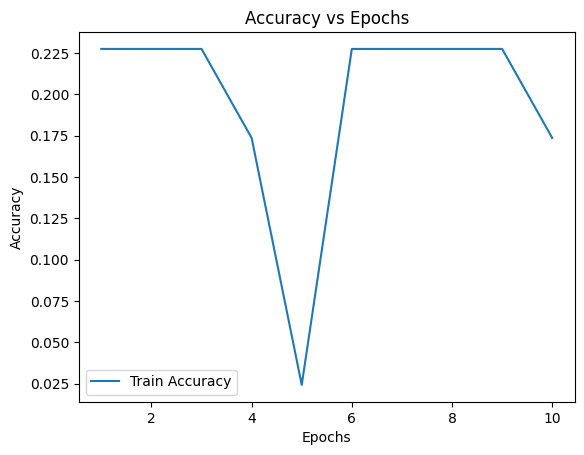

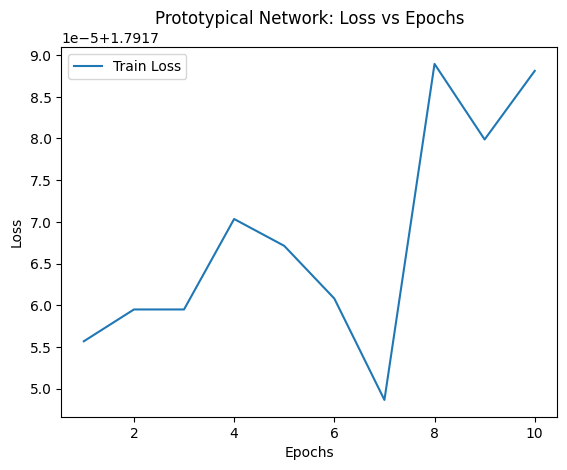

In [31]:
train_losses = []
train_accuracies = []

unique_labels = y_train_tensor.unique().tolist()
print("Unique labels:", unique_labels)

for epoch in range(epochs):
    proto_net.train()
    optimizer.zero_grad()

    train_embeddings = proto_net(X_train_tensor[:len(y_train_tensor)])
    prototypes = calculate_prototypes(train_embeddings, y_train_tensor, unique_labels)
    distances = torch.cdist(train_embeddings, prototypes)

    loss = criterion(-distances, y_train_tensor)

    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    predictions = torch.argmin(distances, dim=1)
    accuracy = (predictions == y_train_tensor).float().mean().item()
    train_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}, Accuracy: {accuracy}")

import matplotlib.pyplot as plt
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.show()

# Plot loss vs epochs
import matplotlib.pyplot as plt
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Prototypical Network: Loss vs Epochs')
plt.legend()
plt.show()

SIAMESE MODEL Meta Learning 2

In [32]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

label_mapping = {0: 'Anxiety', 1: 'Depression', 2: 'Lonely', 3: 'MentalHealth', 4: 'Unknown'}

def map_labels(numeric_labels, label_mapping):
    return [label_mapping.get(label, "Unknown") for label in numeric_labels]

In [33]:
def create_multiclass_pairs(x, y):
    pairs = []
    labels = []
    num_classes = len(np.unique(y))
    class_idx = [np.where(y == i)[0] for i in range(num_classes)]

    for idx, label in enumerate(y):
        pos_idx = np.random.choice(class_idx[label])
        pairs.append([x[idx], x[pos_idx]])
        labels.append(label)

    return np.array(pairs), np.array(labels)

In [34]:
def build_shared_network(input_shape):
    input = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input)
    x = Dense(64, activation='relu')(x)
    return Model(input, x)

X = np.random.rand(1000, 200)
y = np.random.randint(0, 4, size=1000)

In [35]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_pairs, train_labels = create_multiclass_pairs(X_train, y_train)

test_pairs, test_labels = create_multiclass_pairs(X_test, y_test)

input_shape = (200,)
shared_network = build_shared_network(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

processed_a = shared_network(input_a)
processed_b = shared_network(input_b)

In [36]:
l1_distance = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))([processed_a, processed_b])

output = Dense(len(np.unique(y_train)), activation='softmax')(l1_distance)

siamese_model = Model([input_a, input_b], output)
siamese_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

siamese_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 64)             │         33,984 │ input_layer_1[0][0],   │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 64)             │              0 │ functional[0][0],      │
│                           │                        │                │ functional[1][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 4)              │            260 │ lambda[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 34,244 (133.77 KB)

 Trainable params: 34,244 (133.77 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = siamese_model.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],
    train_labels,
    validation_split=0.2,
    batch_size=32,
    epochs=10
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2625 - loss: 1.4095 - val_accuracy: 0.4062 - val_loss: 1.3492
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5429 - loss: 1.2672 - val_accuracy: 0.3875 - val_loss: 1.3020
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6353 - loss: 1.1747 - val_accuracy: 0.4812 - val_loss: 1.2683
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8193 - loss: 1.0506 - val_accuracy: 0.4688 - val_loss: 1.2282
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8736 - loss: 0.9528 - val_accuracy: 0.5375 - val_loss: 1.1788
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9495 - loss: 0.7929 - val_accuracy: 0.5938 - val_loss: 1.1200
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9648 - loss: 0.6771 - val_accuracy: 0.6062 - val_loss: 1.0796
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9849 - loss: 0.5376 - val_accuracy: 0.6687 - val_loss

In [38]:
evaluation = siamese_model.evaluate([test_pairs[:, 0], test_pairs[:, 1]], test_labels)
print("Test Accuracy:", evaluation[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2251 - loss: 1.5800  
Test Accuracy: 0.2549999952316284


In [39]:
y_pred = siamese_model.predict([test_pairs[:, 0], test_pairs[:, 1]])
y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_labels = map_labels(y_pred_classes, label_mapping)
y_test_labels = map_labels(test_labels, label_mapping)

print("Mapped Predictions (Labels):", y_pred_labels[:5])
print("Mapped True Labels (Labels):", y_test_labels[:5])

print("Siamese Network Multi-Class Metrics:")
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mapped Predictions (Labels): ['Lonely', 'MentalHealth', 'Depression', 'Depression', 'MentalHealth']
Mapped True Labels (Labels): ['Depression', 'Lonely', 'Anxiety', 'Depression', 'Anxiety']
Siamese Network Multi-Class Metrics:
Classification Report:
               precision    recall  f1-score   support

     Anxiety       0.28      0.38      0.32        48
  Depression       0.16      0.08      0.11        48
      Lonely       0.26      0.33      0.29        51
MentalHealth       0.27      0.23      0.24        53

    accuracy                           0.26       200
   macro avg       0.24      0.25      0.24       200
weighted avg       0.24      0.26      0.24       200

Confusion Matrix:
 [[18  5 13 12]
 [16  4 17 11]
 [19  5 17 10]
 [12 11 18 12]]


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9984 - loss: 0.2499 - val_accuracy: 0.6687 - val_loss: 0.9216
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9964 - loss: 0.1916 - val_accuracy: 0.6875 - val_loss: 0.9041
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9952 - loss: 0.1511 - val_accuracy: 0.6875 - val_loss: 0.8790
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.1149 - val_accuracy: 0.6750 - val_loss: 0.8671
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9964 - loss: 0.0936 - val_accuracy: 0.6750 - val_loss: 0.8550
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9977 - loss: 0.0764 - val_accuracy: 0.6687 - val_loss: 0.8541
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9969 - loss: 0.0657 - val_accuracy: 0.6687 - val_loss: 0.8450
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9975 - loss: 0.0650 - val_accuracy: 0.6625 - val_loss:

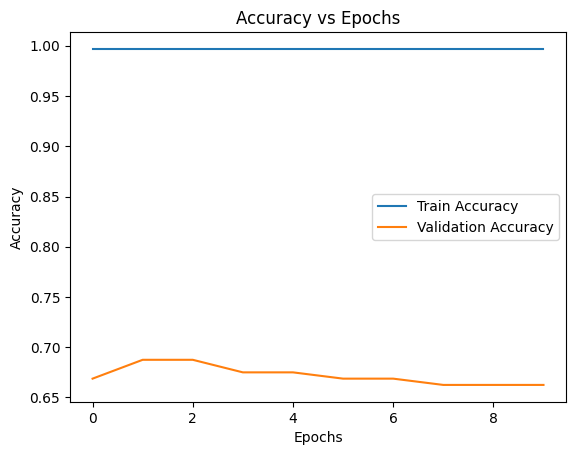

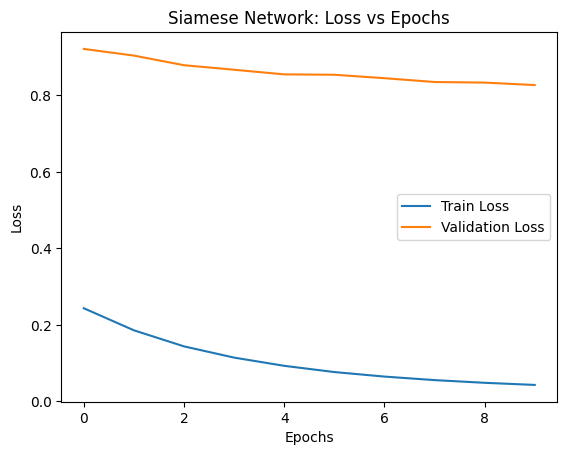

In [40]:
history = siamese_model.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],
    train_labels,
    validation_split=0.2,
    batch_size=32,
    epochs=epochs
)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Siamese Network: Loss vs Epochs')
plt.legend()
plt.show()

BERT Transfer Learning

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
import torch
from tqdm import tqdm
from sklearn.metrics import classification_report

In [42]:
print(df.columns)
print(df['subreddit'].unique())

Index(['score', 'selftext', 'subreddit', 'title', 'Label', 'CAT 1'], dtype='object')
['Anxiety' 'depression' 'mentalhealth' 'SuicideWatch' 'lonely']


In [43]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['subreddit'])

label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Anxiety': 0, 'SuicideWatch': 1, 'depression': 2, 'lonely': 3, 'mentalhealth': 4}


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    df['selftext'], df['label_encoded'], test_size=0.2, random_state=42
X_train, X_test = X_train.tolist(), X_test.tolist()
y_train, y_test = y_train.tolist(), y_test.tolist()

In [45]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_data(tokenizer, texts, labels, max_length=128):
    tokens = tokenizer(
        texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt"
    )
    return tokens['input_ids'], tokens['attention_mask'], torch.tensor(labels)

X_train_ids, X_train_mask, y_train_tensor = tokenize_data(bert_tokenizer, X_train, y_train)
X_test_ids, X_test_mask, y_test_tensor = tokenize_data(bert_tokenizer, X_test, y_test)

In [46]:
class RedditDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }

train_dataset = RedditDataset(X_train_ids, X_train_mask, y_train_tensor)
test_dataset = RedditDataset(X_test_ids, X_test_mask, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

In [47]:
num_labels = 5

bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

optimizer = AdamW(bert_model.parameters(), lr=5e-5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [48]:
epochs = 3

for epoch in range(epochs):
    bert_model.train()
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

Epoch 2: 100%|██████████| 20/20 [03:21<00:00, 10.09s/it, loss=1.17]


In [49]:
bert_model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        y_pred.extend(torch.argmax(logits, dim=1).cpu().numpy())
        y_true.extend(labels.cpu().numpy())

y_pred_labels = label_encoder.inverse_transform(y_pred)
y_true_labels = label_encoder.inverse_transform(y_true)

print(classification_report(y_true_labels, y_pred_labels))

              precision    recall  f1-score   support

     Anxiety       0.09      0.25      0.13         4
SuicideWatch       0.00      0.00      0.00        10
  depression       0.37      0.77      0.50        13
      lonely       0.00      0.00      0.00         1
mentalhealth       0.00      0.00      0.00        12

    accuracy                           0.28        40
   macro avg       0.09      0.20      0.13        40
weighted avg       0.13      0.28      0.18        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
bert_model.save_pretrained('./bert-reddit-model')
bert_tokenizer.save_pretrained('./bert-reddit-model') #saving for future enhancements and upgrades

('./bert-reddit-model/tokenizer_config.json',
 './bert-reddit-model/special_tokens_map.json',
 './bert-reddit-model/vocab.txt',
 './bert-reddit-model/added_tokens.json')

Epoch 2: 100%|██████████| 20/20 [03:20<00:00, 10.03s/it, loss=0.113]


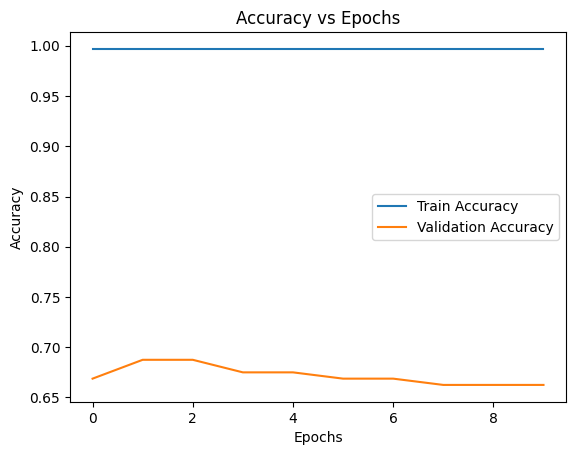

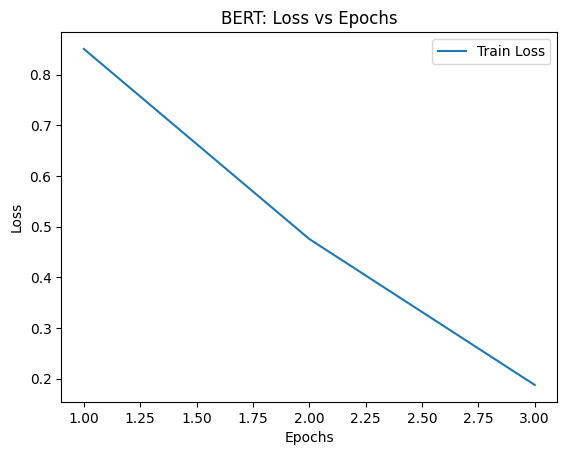

In [51]:
train_losses = []

for epoch in range(epochs):
    bert_model.train()
    loop = tqdm(train_loader, leave=True)
    epoch_loss = 0

    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

    train_losses.append(epoch_loss / len(train_loader))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.show()

plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('BERT: Loss vs Epochs')
plt.legend()
plt.show()

LSTM Deep Neural Network

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

In [53]:
print(df.head())

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['subreddit'])

X_train, X_test, y_train, y_test = train_test_split(
    df['selftext'], df['label_encoded'], test_size=0.2, random_state=42
)

   score                                           selftext subreddit  \
0      1  Of Covid-19. Of 2021. Of not getting the vacci...   Anxiety   
1      1  i feel like im losing my mind, my health anxie...   Anxiety   
2      1  This year I’ve realized I really fear death. M...   Anxiety   
3      1  Hiya~ There have been a couple teenagers at wo...   Anxiety   
4      1  I need some advice. I have anxiety, and I have...   Anxiety   

                                               title       Label  CAT 1  \
0                                         I'm scared  Early life    NaN   
1  experiencing fear so visceral i unlocked memor...  Early life    NaN   
2  Fear of dying significantly deteriorating my q...  Early life    NaN   
3  I’ve been harassed at work for a couple months...  Early life    NaN   
4         Why do I feel like I am constantly dying ?  Early life    NaN   

   label_encoded  
0              0  
1              0  
2              0  
3              0  
4              

In [54]:
vocab_size = 10000
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

print(f"Padded Training Shape: {X_train_padded.shape}")
print(f"Padded Testing Shape: {X_test_padded.shape}")

Padded Training Shape: (160, 200)
Padded Testing Shape: (40, 200)


In [55]:
embedding_dim = 128
lstm_units = 64

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(lstm_units, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
batch_size = 32
epochs = 5

history = model.fit(
    X_train_padded,
    y_train,
    validation_data=(X_test_padded, y_test),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.2987 - loss: 1.6070 - val_accuracy: 0.3250 - val_loss: 1.6001
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.4069 - loss: 1.5818 - val_accuracy: 0.3250 - val_loss: 1.5808
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.4563 - loss: 1.5349 - val_accuracy: 0.3250 - val_loss: 1.5555
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.4568 - loss: 1.4916 - val_accuracy: 0.3250 - val_loss: 1.5355
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.4437 - loss: 1.4071 - val_accuracy: 0.3250 - val_loss: 1.5663


In [57]:
y_pred = model.predict(X_test_padded)
y_pred_classes = y_pred.argmax(axis=1)

y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_test_labels = label_encoder.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred_labels))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step
              precision    recall  f1-score   support

     Anxiety       0.00      0.00      0.00         4
SuicideWatch       0.00      0.00      0.00        10
  depression       0.33      1.00      0.49        13
      lonely       0.00      0.00      0.00         1
mentalhealth       0.00      0.00      0.00        12

    accuracy                           0.33        40
   macro avg       0.07      0.20      0.10        40
weighted avg       0.11      0.33      0.16        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


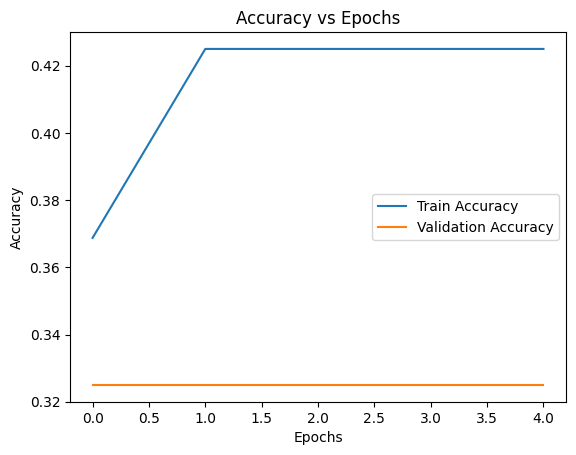

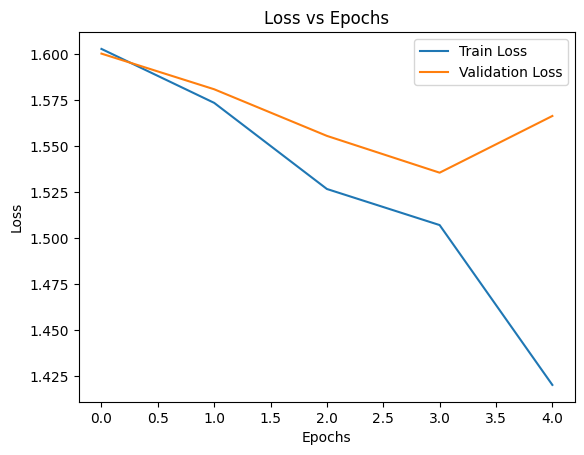

In [58]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

In [59]:
model.save('lstm_reddit_model.h5') #saving for future works or updates

In [60]:
print("LSTM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Precision:", precision_score(y_test, y_pred_classes, average='macro'))
print("Recall:", recall_score(y_test, y_pred_classes, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_classes, average='macro'))

LSTM Metrics:
Accuracy: 0.325
Precision: 0.065
Recall: 0.2
F1-Score: 0.09811320754716982


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
